<a href="https://colab.research.google.com/github/gamzenurmadan/analysis-on-breastcancer-dataset/blob/main/260201084_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework #2 (due 10th of November, 11:59 PM):

In [ ]:
#To upload .csv file
from google.colab import files
 
uploaded = files.upload()

Saving winequality_white.csv to winequality_white.csv



### Part 1)
- Load the breast cancer dataset using datasets.load_breast_cancer()
- Use scatter plots to look at the data. You can select two features for x and y axes at a time and color the samples according to their classes. You are not expected to try all pairs, which would be too many. But please show a few examples. 
- Also use box plots to look at the data. Please show that you are able to examine some features (not all them are necessary).
- Create a training and test set (with shuffling).
- Train a **decision tree classifier** using the training set.
- What are the top 5 most important (discriminative) features?
- Train a **logistic regression model** using the training set.
- Which model (DT or LR) performed better on the test set? Note: You can use score() method of built-in classifiers to compare.


For getting target and feature names arrays, I used sklearn documentation. Reference : https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html?highlight=sklearn+datasets+load_breast#sklearn.datasets.load_breast_cancer

In [ ]:
#Imports
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #To create test and training set
from sklearn.tree import DecisionTreeClassifier #For decision tree classifier implementation
from sklearn.linear_model import LogisticRegression #For logistic regression model
from sklearn.tree import DecisionTreeRegressor #For Q2
from sklearn.metrics import mean_squared_error #For Q2

breast_cancer_dataset = datasets.load_breast_cancer() #Loading Dataset

breast_cancer_df = pd.DataFrame(np.c_[breast_cancer_dataset['data'], breast_cancer_dataset['target']], columns= list(breast_cancer_dataset['feature_names']) + ['target']) #Loading data into a dataframe

print(breast_cancer_dataset.feature_names) #to see the features the dataset includes
print(breast_cancer_dataset.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


The x axis label does not shown because of the bug. Source : https://github.com/pandas-dev/pandas/issues/36064

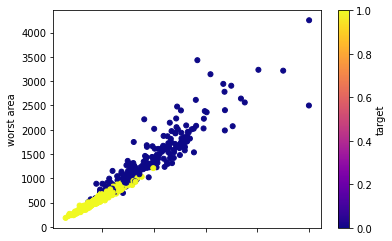

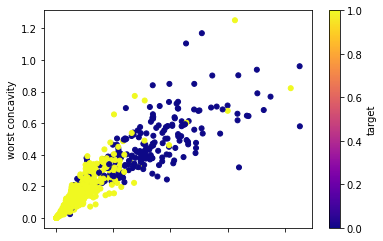

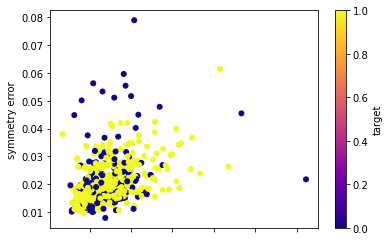

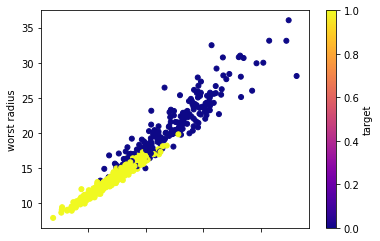

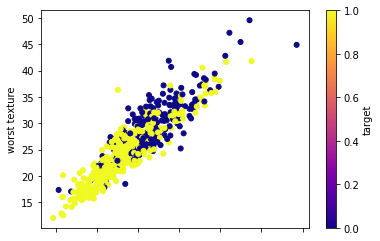

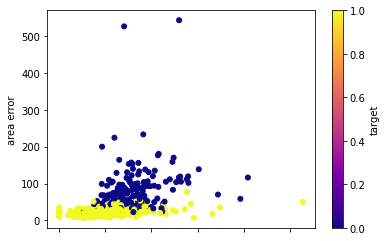

In [ ]:
#Plotting scatter plots 
breast_cancer_df.plot.scatter(x='mean area', y='worst area', s=25, c='target', colormap='plasma')
breast_cancer_df.plot.scatter(x='mean concavity', y='worst concavity',s=25, c='target', colormap='plasma')
breast_cancer_df.plot.scatter(x='smoothness error', y='symmetry error', s=25, c='target', colormap='plasma')
breast_cancer_df.plot.scatter(x='mean radius', y='worst radius', s=25, c='target', colormap='plasma')
breast_cancer_df.plot.scatter(x='mean texture', y='worst texture', s=25, c='target', colormap='plasma')
breast_cancer_df.plot.scatter(x='concave points error', y='area error', s=25, c='target', colormap='plasma')

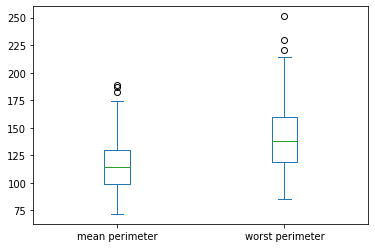

In [ ]:
#Plotting box plots
breast_cancer_df[['mean perimeter', 'worst perimeter']][breast_cancer_df['target']==0].plot.box()
plt.show()
"""
For this graph we can say that the average worst perimeter is higher than mean perimeter with malignant target
"""

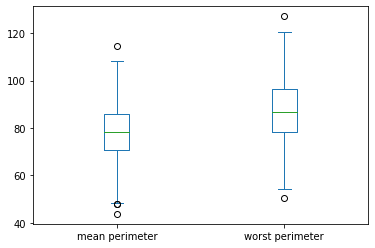

In [ ]:
breast_cancer_df[['mean perimeter', 'worst perimeter']][breast_cancer_df['target']==1].plot.box()
plt.show()
"""
We can say that for this graph, the average worst perimeter is higher than mean perimeter with benign target too.
But malignant target's perimeter values are higher than benign's
"""

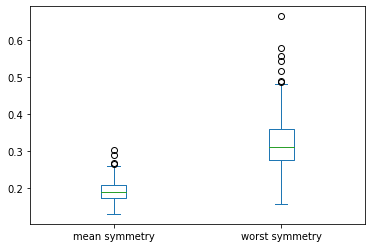

In [ ]:
breast_cancer_df[['mean symmetry', 'worst symmetry']][breast_cancer_df['target']==0].plot.box()
plt.show()
"""
For this graph we can say that the average worst symmetry is higher than mean symmetry with malignant target
"""

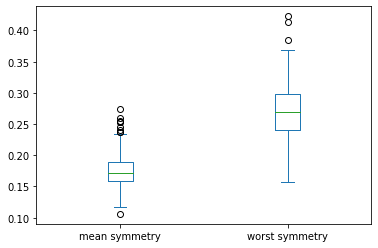

In [ ]:
breast_cancer_df[['mean symmetry', 'worst symmetry']][breast_cancer_df['target']==1].plot.box()
plt.show()
"""
We can say that for this graph, the average worst symmetry is higher than mean symmetry with benign target too.
But malignant target's perimeter values are higher than benign's.
Also the difference between upper and lower quartile is bigger than malignant target's result.
"""

In [ ]:
#Creating and shuffling test and training sets, using default shuffle and test size settings
X_train, X_test, y_train, y_test = train_test_split(breast_cancer_dataset['data'], breast_cancer_dataset['target'],random_state=42) #stating random state more than 0 to get the same results always

tree = DecisionTreeClassifier(max_depth=15) #Training Decision Tree Classifier
tree.fit(X_train, y_train)  

importance_array = tree.feature_importances_ #calculating feature importance

print("The importance array as it follows:\n", importance_array, "\n")

for i in range(5): #Taking the top 5 important feature
  max_index = np.argmax(importance_array)  #taking the index number of the maximum value
  print("The {index_number}th important feature is {feature_name}".format(index_number=i+1, feature_name=breast_cancer_dataset.feature_names[max_index])) #Finding the equivalent of the index number in features' names array
  importance_array[max_index] = 0 #assigning current maximum value to 0 to get the next maximum value


The importance array as it follows:
 [0.         0.02601101 0.         0.         0.         0.
 0.         0.69593688 0.         0.         0.         0.
 0.         0.01277192 0.00826156 0.         0.         0.01702539
 0.         0.         0.05899273 0.09949554 0.         0.03452044
 0.00985664 0.         0.00838371 0.02874416 0.         0.        ] 

The 1th important feature is mean concave points
The 2th important feature is worst texture
The 3th important feature is worst radius
The 4th important feature is worst area
The 5th important feature is worst concave points


In [ ]:
lr = LogisticRegression(C=0.01, max_iter=1000)
lr.fit(X_train, y_train) 

print("DT score is:", tree.score(X_test, y_test))
print("LR score is:", lr.score(X_test, y_test))
print("We should select the score that is the most close to 1. From the results, we can say that Logistic Regression model performed better on the test set.")

DT score is: 0.9440559440559441
LR score is: 0.972027972027972
We should select the score that is the most close to 1. From the results, we can say that Logistic Regression model performed better on the test set.


### Part 2)

- Get *winequality_white.csv* which uploaded with the Homework file.

- Last column (quality) is the target variable.

- Train a decision tree regressor using the training set. Try different 'min_samples_split' and 'max_depth' parameters. Which ones worked best on the test set? What is the MSE on the test set with the best parameters.

The first attempt at reading csv was failure. Because the columns were seperated by ';' so the dataframe was not proper. To avoid this, I used sep parameter.

In [ ]:
wine_df = pd.read_csv('winequality_white.csv', sep=';')

X=wine_df.drop('quality', axis=1)
y= wine_df.quality

X_wine_train, X_wine_test, y_wine_train, y_wine_test = train_test_split(X, y, random_state=42) #shuffling and splitting the data with default size and shuffle settings

In [ ]:
tree_reg_first = DecisionTreeRegressor(max_depth=30, min_samples_split=3)
tree_reg_first.fit(X_wine_train, y_wine_train) #training the first model

tree_reg_second = DecisionTreeRegressor(max_depth=30, min_samples_split=5)
tree_reg_second.fit(X_wine_train, y_wine_train) #training the second model

tree_reg_third = DecisionTreeRegressor(max_depth=50, min_samples_split=5)
tree_reg_third.fit(X_wine_train, y_wine_train) #training the third model

tree_reg_fourth = DecisionTreeRegressor(max_depth=60, min_samples_split=6)
tree_reg_fourth.fit(X_wine_train, y_wine_train) #training the fourth model

tree_reg_fifth = DecisionTreeRegressor(max_depth=70, min_samples_split=7)
tree_reg_fifth.fit(X_wine_train, y_wine_train) #training the fifth model

tree_reg_sixth = DecisionTreeRegressor(max_depth=80, min_samples_split=8)
tree_reg_sixth.fit(X_wine_train, y_wine_train) #training the sixth model

print("The score of the first model is: ", tree_reg_first.score(X_wine_test, y_wine_test))
print("The score of the second model is: ", tree_reg_second.score(X_wine_test, y_wine_test))
print("The score of the third model is: ", tree_reg_third.score(X_wine_test, y_wine_test))
print("The score of the fourth model is: ", tree_reg_fourth.score(X_wine_test, y_wine_test))
print("The score of the fifth model is: ", tree_reg_fifth.score(X_wine_test, y_wine_test))
print("The score of the sixth model is: ", tree_reg_sixth.score(X_wine_test, y_wine_test))

The score of the first model is:  0.14775312147530384
The score of the second model is:  0.13234561484627594
The score of the third model is:  0.16054646347248724
The score of the fourth model is:  0.20824021768924716
The score of the fifth model is:  0.15865550237454729
The score of the sixth model is:  0.19645724093381123


In [ ]:
#As the fourth model got the highest score, the mse calculation will be done on fourth model
y_predicted= tree_reg_fourth.predict(X_wine_test)
print("The mse on fourth model is:", mean_squared_error(y_predicted, y_wine_test))

The mse on fourth model is: 0.6146741496598639
